0 are 1805
1 are 370
2 are 999
3 are 193
4 are 295
length of training:3662
['1805', '370', '999', '193', '295']
551
2641
470
Found 2641 validated image filenames belonging to 5 classes.
Found 470 validated image filenames belonging to 5 classes.
Found 551 validated image filenames belonging to 5 classes.
71688192/71686520 [==============================] - 1s 0us/step
Epoch 1/50
82/82 [==============================] - 2551s 31s/step - loss: 0.9083 - accuracy: 0.6562 - val_loss: 2.3498 - val_accuracy: 0.0558

Epoch 00001: val_loss improved from inf to 2.34984, saving model to /content/drive/MyDrive/aptos2019-blindness-detection/weightsefficientnetb4v3.hdf5
Epoch 2/50
82/82 [==============================] - 830s 10s/step - loss: 0.5609 - accuracy: 0.7962 - val_loss: 1.5539 - val_accuracy: 0.2969

Epoch 00002: val_loss improved from 2.34984 to 1.55389, saving model to /content/drive/MyDrive/aptos2019-blindness-detection/weightsefficientnetb4v3.hdf5
Epoch 3/50
82/82 [====================

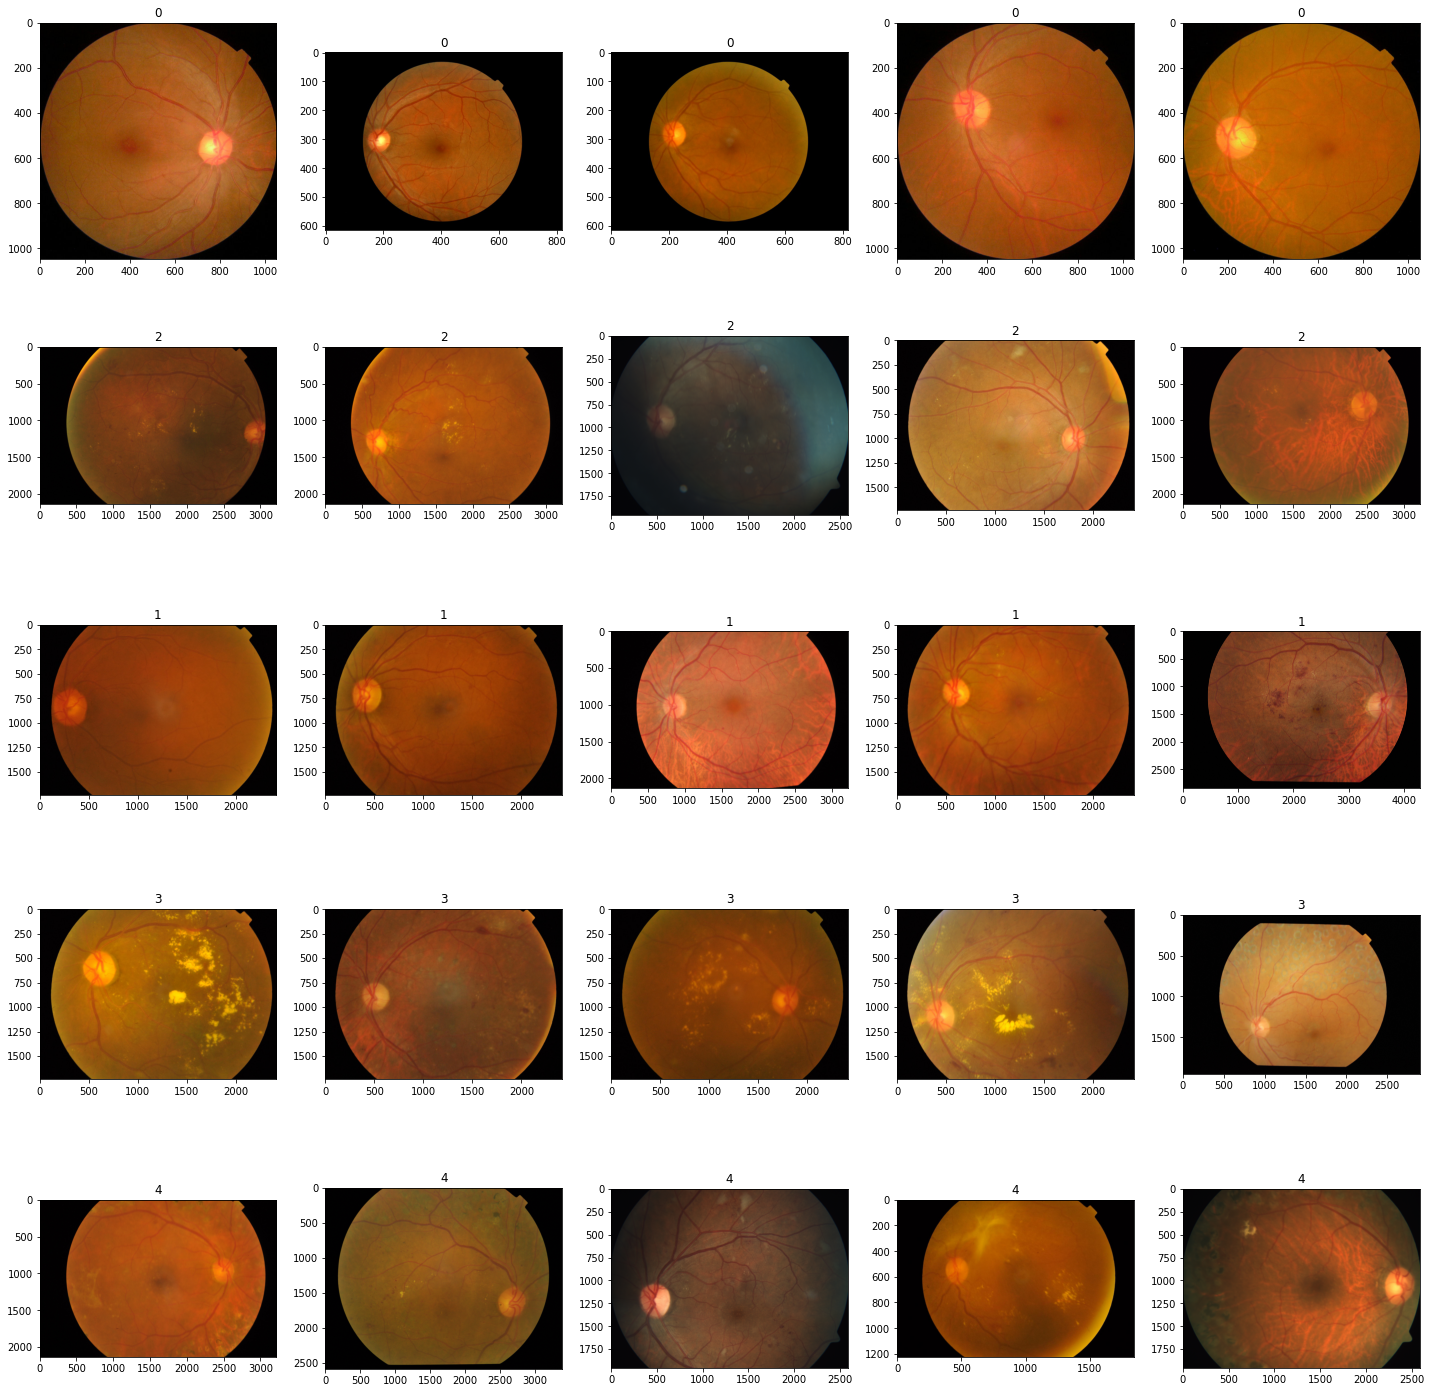

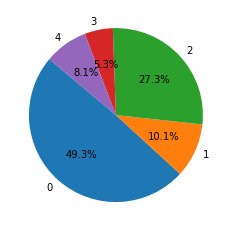

In [ ]:
#Import all necessary libraries which are useful for Preprocessing the images,training the model,visualise the results
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

import tensorflow as tf
import PIL
from PIL import Image, ImageFile

from keras.preprocessing.image import ImageDataGenerator
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop 
import PIL
import seaborn as sns
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


#Here we crop the images to eliminate any unneccessary data
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img


IMG_WIDTH = 380
IMG_HEIGHT = 380

#Here we preprocess the image to invoke crop_image function,to resize the images according to CNN architecture
def preprocess_image(image, sigmaX=10):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image



ImageFile.LOAD_TRUNCATED_IMAGES = True

#Now we import the images from drive folder and create train folder which contains 3662 images and 
#label folder which has 3662 values of different categories 0,1,2,3,4

import cv2
train=[]
label=[]
count0=0
count1=0
count2=0
count3=0
count4=0
for i in os.listdir(r'/content/drive/MyDrive/aptos2019-blindness-detection/train'):
 
  trainsetfolder = os.listdir(os.path.join(r'/content/drive/MyDrive/aptos2019-blindness-detection/train',i))
  for j in trainsetfolder:
       i1 = '/content/drive/MyDrive/aptos2019-blindness-detection/train'
       img = os.path.join(i1,i,j)
       if(i == '0'):
         count0 = count0 + 1
       elif(i == '1'):
         count1 = count1 + 1
       elif(i == '2'):
         count2 = count2 + 1
       elif(i == '3'):
         count3 = count3 + 1
       else:
         count4 = count4 + 1
       train.append(img)
       label.append(i) 
trainimagescount=[]
print("0 are "+str(count0))
print("1 are "+str(count1)) 
print("2 are "+str(count2))
print("3 are "+str(count3))
print("4 are "+str(count4))
print("length of training:"+str(len(train)))
for i in range(5):
   if(i == 0):
     trainimagescount.append(str(count0))
   elif(i == 1):
     trainimagescount.append(str(count1))
   elif(i == 2):
     trainimagescount.append(str(count2))
   elif(i == 3):
     trainimagescount.append(str(count3))
   else:
     trainimagescount.append(str(count4))

#We view the images in each of five category.Below is sample visualization of 5 images in each category

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('/content/drive/MyDrive/aptos2019-blindness-detection/train'):
  path = '/content/drive/MyDrive/aptos2019-blindness-detection/train'
  train_class = os.listdir(os.path.join(path, i))
  for j in range(5):
    img = os.path.join(path, i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

#Pie chart for viewing distribution of images

figureObject, axesObject = plt.subplots()
print(trainimagescount)
labels=[0,1,2,3,4]
axesObject.pie(trainimagescount,
                labels=labels,autopct='%1.1f%%',startangle=140)


temp = list(zip(train, label))
random.shuffle(temp)
train, label = zip(*temp)

#Creating a dataframe with two columns images (path) and label assosciated to it

retina_df = pd.DataFrame({'Image': train,'Labels':label})
retina_df

index = []
train_i = []
train_l = []

test_i = []
test_l = []

validation_i = []
validation_l = []

#We are splitting the data into train set,test set,validation set.We divide the dataset into train set which is 85% of total number of images
# and 15% to test set folder.Again in 85% train set 85% of this goes to trainset folder,15% of this 85% goes to validation set folder.
#So now,train_i[] folder contains 2641 images, test_i[] folder contains 551 images, validation_i[] folder contains 470 images

i=0
j=0
while(i <= 3662 and j <= 270):
  if(label[i] == "0"):
    test_i.append(train[i])
    test_l.append(label[i])
    index.append(i)
    j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 55):
  if(label[i] == "1"):
    test_i.append(train[i])
    test_l.append(label[i])
    index.append(i)
    j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 149):
  if(label[i] == "2"):
    test_i.append(train[i])
    test_l.append(label[i])
    index.append(i)
    j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 28):
  if(label[i] == "3"):
    test_i.append(train[i])
    test_l.append(label[i])
    index.append(i)
    j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 44):
  if(label[i] == "4"):
    test_i.append(train[i])
    test_l.append(label[i])
    index.append(i)
    j+=1
  i+=1



i=0
j=0
while(i <= 3662 and j <= 230):
  if((i not in index)):
    if(label[i] == "0"):
      validation_i.append(train[i])
      validation_l.append(label[i])
      index.append(i)
      j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 47):
  if((i not in index)):
    if(label[i] == "1"):
      validation_i.append(train[i])
      validation_l.append(label[i])
      index.append(i)
      j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 127):
  if((i not in index)):
    if(label[i] == "2"):
      validation_i.append(train[i])
      validation_l.append(label[i])
      index.append(i)
      j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 24):
  if((i not in index)):
    if(label[i] == "3"):
      validation_i.append(train[i])
      validation_l.append(label[i])
      index.append(i)
      j+=1
  i+=1

i=0
j=0
while(i <= 3662 and j <= 37):
  if((i not in index)):
    if(label[i] == "4"):
      validation_i.append(train[i])
      validation_l.append(label[i])
      index.append(i)
      j+=1
  i+=1


i=0
j=0
while(i <= 3661):
  if(i in index):
    pass
  else:
    train_i.append(train[i])
    train_l.append(label[i])
  i+=1


print(len(test_i))
print(len(train_i))
print(len(validation_i))

#The dataframe train_df contains training set images,test_df contains testing set images,validation_df contains validation set
#images

train_df = pd.DataFrame({'Image': train_i,'Labels':train_l})
train_df = shuffle(train_df)

test_df = pd.DataFrame({'Image': test_i,'Labels': test_l})
test_df = shuffle(test_df)

validation_df = pd.DataFrame({'Image': validation_i,'Labels':validation_l})
validation_df = shuffle(validation_df)

#Now we create ImageDataGenerator class for Training set and testing set by randomly flippping the images,rotating and 
#applying preprocesssing by cropping the images

train_datagen = ImageDataGenerator(
        rescale=1./128,
        rotation_range=360,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_image,
        validation_split=0.15,)

test_datagen = ImageDataGenerator(rescale=1./128)

#Now we instantiate the train_generator,validation_generator,test_generator which are used for training
#The image size for EfficientNetB4 algorithm is 380,380

num_classes = 5
img_size = (380, 380, 3)
epochs = 100
train_generator = train_datagen.flow_from_dataframe(
                  train_df,
                  directory='',
                  x_col="Image",
                  y_col="Labels",
                  target_size=(380, 380),
                  color_mode="rgb",
                  class_mode="categorical",
                  batch_size=32,)


validation_generator = train_datagen.flow_from_dataframe(
                        validation_df,
                        directory='',
                        x_col="Image",
                        y_col="Labels",
                        target_size=(380, 380),
                        color_mode="rgb",
                        class_mode="categorical",
                        batch_size=32)

test_generator = test_datagen.flow_from_dataframe(
                        test_df,
                        directory='',
                        x_col="Image",
                        y_col="Labels",
                        target_size=(380 , 380),
                        color_mode="rgb",
                        class_mode="categorical",
                        batch_size=32)

#Here we are using Transfer learning approach and we instantiate EfficientNetB4 instance which is pretrained on 
#Imagenet dataset

def get_model(file_path, input_shape, num_classes):
    input_tensor = Input(shape=input_shape)
    base_model = EfficientNetB4(include_top=False,
                             weights='imagenet',
                             input_tensor=input_tensor)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    output_tensor = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    optimizer = RMSprop(lr=1e-4)
    #Compiling the model of EfficientNetB4 architecture
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
    return model

model = get_model(
    file_path='',
    input_shape=img_size,
    num_classes=num_classes
)

#Adding model checkpoints to save the best weights to the given folder path
checkPoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/aptos2019-blindness-detection/weightsefficientnetb4v3.hdf5',
    verbose=1,
    save_best_only=True,
)
#Adding early stopping by monitoring the val_loss with patience 15
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    verbose=1,
    mode='min'
)

#Now we traing the model with 50 epoch
history = model.fit(train_generator,
    steps_per_epoch = train_generator.n // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // 32,
    callbacks=[checkPoint, earlyStopping],
                   )

#We are saving our model instance to the given path
from keras.models import load_model
model.save('/content/drive/MyDrive/aptos2019-blindness-detection/EfficientnetB4v3.h5')



Found 556 validated image filenames belonging to 5 classes.
17/17 [==============================] - 81s 4s/step - loss: 0.4254 - accuracy: 0.8952
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       272
           1       0.95      0.37      0.53        57
           2       0.78      0.89      0.83       151
           3       1.00      0.37      0.54        30
           4       0.77      0.59      0.67        46

    accuracy                           0.84       556
   macro avg       0.87      0.64      0.70       556
weighted avg       0.85      0.84      0.82       556



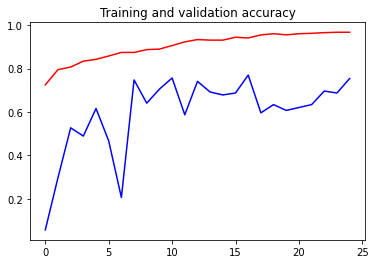

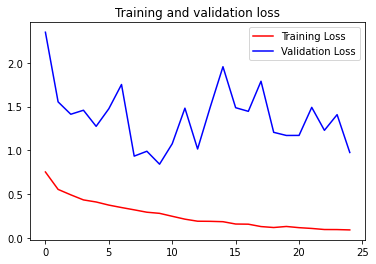

In [ ]:
#Visualize results with accuracy plots and loss plots for both training and validation


acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(len(acc)) 
  
plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
  
plt.figure() 
  
plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend() 

#We are now predicting the accuracy of test set
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

#Code for visualizing the classification report o

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test_i)):
  img= PIL.Image.open(test_df['Image'].tolist()[item])
  img = img.resize((380,380))
  image.append(img)
  img = np.asarray(img, dtype= np.float32)
  img = img / 255
  img = img.reshape(-1,380,380,3)
  predict = model.predict(img)
  predict = np.argmax(predict)
  prediction.append(labels[predict])
  original.append(test_df['Labels'].tolist()[item])

prediction = [str(x) for x in prediction]

print(classification_report(original,prediction))